In [81]:
import sys
sys.version

'3.6.5 (default, Sep  5 2018, 06:12:07) \n[GCC 4.8.4]'

In [82]:
import pandas as pd
import numpy as np

In [83]:
CCTV_Seoul = pd.read_csv('../48_lecture_file/Seoul_CCTV.csv', encoding='utf-8')

In [84]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)

In [85]:
pop_Seoul = pd.read_excel('../48_lecture_file/Seoul_Population.xls',
                          header=2,
                          usecols='B, D, G, J, N',
                          encoding='utf-8')

In [86]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수',
                         pop_Seoul.columns[2] : '한국인',
                         pop_Seoul.columns[3] : '외국인',
                         pop_Seoul.columns[4] : '고령자',}, inplace=True)

In [87]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2017년']+\
                           CCTV_Seoul['2018년']/CCTV_Seoul['2015년 이전'] * 100)

In [88]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163569,153780,9789,26512
2,중구,135427,126032,9395,21798
3,용산구,245245,229677,15568,37331
4,성동구,316068,308066,8002,42171
5,광진구,370519,355748,14771,44806


In [89]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163569,153780,9789,26512,5.984630,16.208450
2,중구,135427,126032,9395,21798,6.937317,16.095756
3,용산구,245245,229677,15568,37331,6.347938,15.221921
4,성동구,316068,308066,8002,42171,2.531734,13.342382
5,광진구,370519,355748,14771,44806,3.986570,12.092767


In [90]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,3431,765,577,448,1355.057418,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1879,1027,194,273,385,504.487829,437050,432749,4301,57680,0.984098,13.197575
2,강북구,1265,691,254,1,319,301.164978,326063,322385,3678,57401,1.128003,17.604267
3,강서구,1617,909,190,264,254,481.942794,606981,600257,6724,78042,1.107778,12.857404
4,관악구,3985,2001,619,694,671,1346.533233,521960,504048,17912,71317,3.431681,13.663308


In [91]:
data_result.drop(['2015년 이전'], axis=1, inplace=True)
data_result.drop(['2016년'], axis=1, inplace=True)

In [92]:
del data_result['2017년']
del data_result['2018년']

In [93]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1355.057418,551888,546952,4936,66011,0.894384,11.960941
1,강동구,1879,504.487829,437050,432749,4301,57680,0.984098,13.197575
2,강북구,1265,301.164978,326063,322385,3678,57401,1.128003,17.604267
3,강서구,1617,481.942794,606981,600257,6724,78042,1.107778,12.857404
4,관악구,3985,1346.533233,521960,504048,17912,71317,3.431681,13.663308


In [94]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,1355.057418,551888,546952,4936,66011,0.894384,11.960941
강동구,1879,504.487829,437050,432749,4301,57680,0.984098,13.197575
강북구,1265,301.164978,326063,322385,3678,57401,1.128003,17.604267
강서구,1617,481.942794,606981,600257,6724,78042,1.107778,12.857404
관악구,3985,1346.533233,521960,504048,17912,71317,3.431681,13.663308


In [95]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

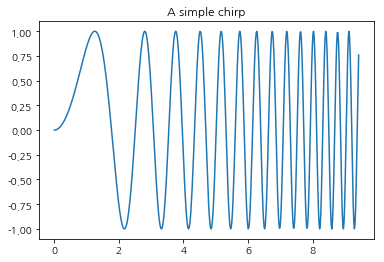

In [96]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

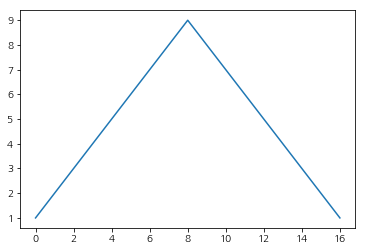

In [97]:
plt.figure
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1])
plt.show()

In [98]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

In [99]:
type(t)

numpy.ndarray

In [100]:
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 1.197e+01 1.198e+01 1.199e+01]


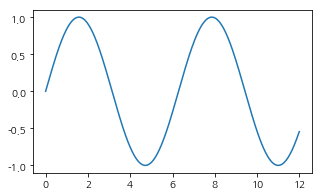

In [101]:
plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.show()

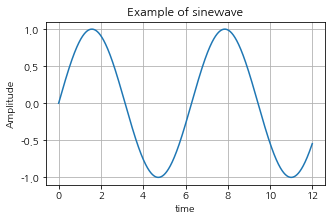

In [102]:
plt.figure(figsize=(5, 3))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

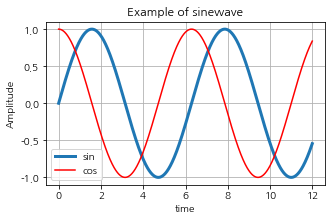

In [103]:
plt.figure(figsize=(5, 3))
plt.plot(t, np.sin(t), lw=3, label='sin')
# color = 'r'이라 두어도 된다.
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

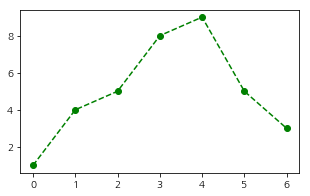

In [104]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(5, 3))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

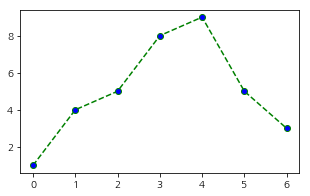

In [105]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(5, 3))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=6)
plt.show()

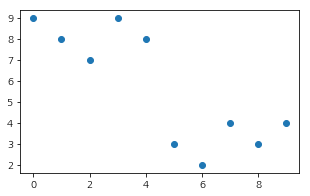

In [106]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])
plt.figure(figsize=(5, 3))
plt.scatter(t, y)
plt.show()

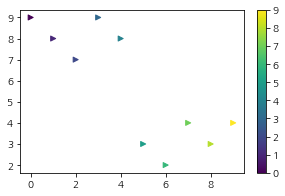

In [107]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])
colormap = t
plt.figure(figsize=(5, 3))
plt.scatter(t, y, s=25, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [108]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

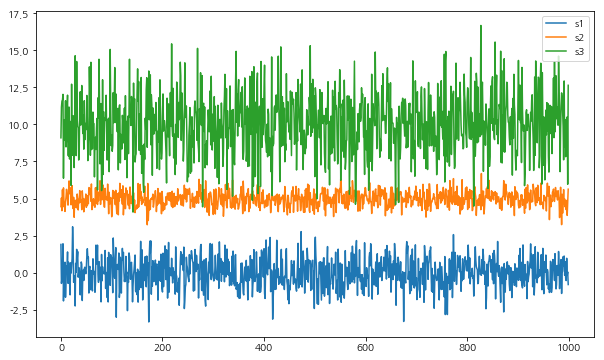

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

In [110]:
!ls -al /usr/share/fonts/truetype/nanum

합계 25096
drwxr-xr-x 2 root root    4096  7월  9 13:57 .
drwxr-xr-x 6 root root    4096  7월  9 13:57 ..
-rw-r--r-- 1 root root 4186072 12월 28  2013 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4415956 12월 28  2013 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4343844 12월 28  2013 NanumGothic.ttf
-rw-r--r-- 1 root root 4288380 12월 28  2013 NanumGothicBold.ttf
-rw-r--r-- 1 root root 3808496 12월 28  2013 NanumMyeongjo.ttf
-rw-r--r-- 1 root root 4638736 12월 28  2013 NanumMyeongjoBold.ttf


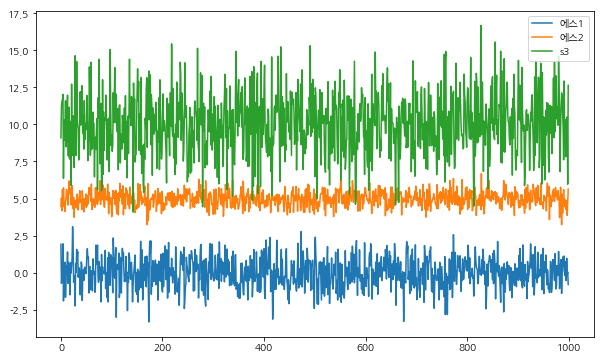

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='에스1')
plt.plot(s2, label='에스2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

In [112]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:\Windows/Font/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System!')

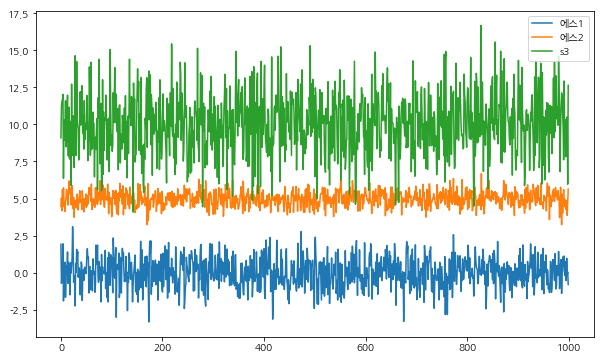

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(s1, label='에스1')
plt.plot(s2, label='에스2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

In [114]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,1355.057418,551888,546952,4936,66011,0.894384,11.960941
강동구,1879,504.487829,437050,432749,4301,57680,0.984098,13.197575
강북구,1265,301.164978,326063,322385,3678,57401,1.128003,17.604267
강서구,1617,481.942794,606981,600257,6724,78042,1.107778,12.857404
관악구,3985,1346.533233,521960,504048,17912,71317,3.431681,13.663308


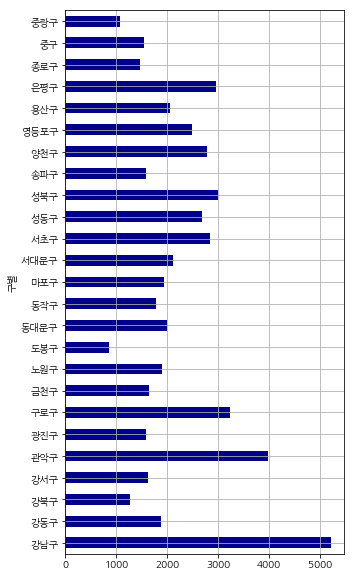

In [117]:
data_result['소계'].plot(kind='barh', color='darkblue', 
                         grid=True, figsize=(5, 10))
plt.show()

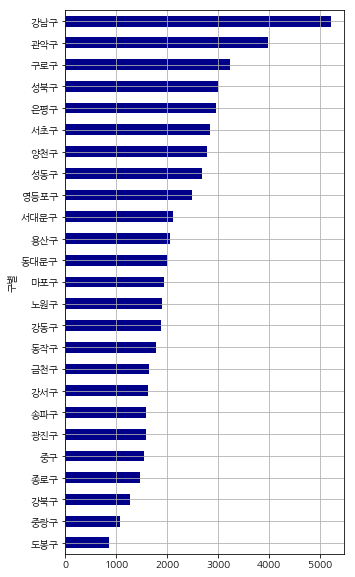

In [119]:
data_result['소계'].sort_values().plot(kind='barh', color='darkblue', 
                                       grid=True, figsize=(5, 10))
plt.show()

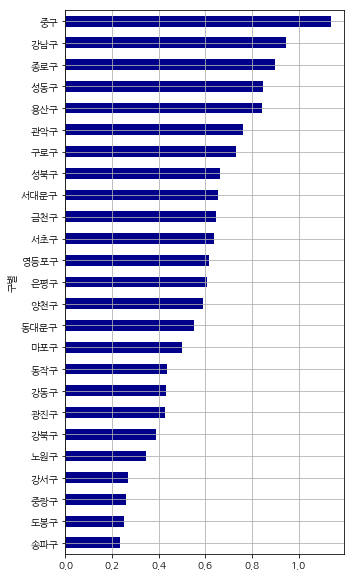

In [121]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', color='darkblue',
                                       grid=True, figsize=(5, 10))

plt.show()

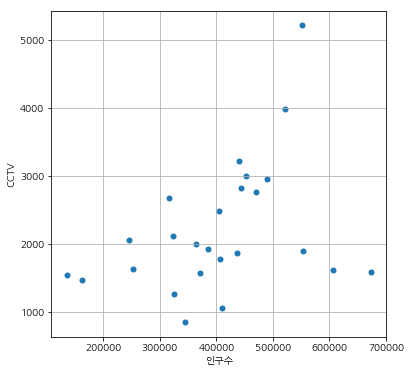

In [122]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=25)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [124]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.85090233e-03, 1.06915090e+03])

In [127]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

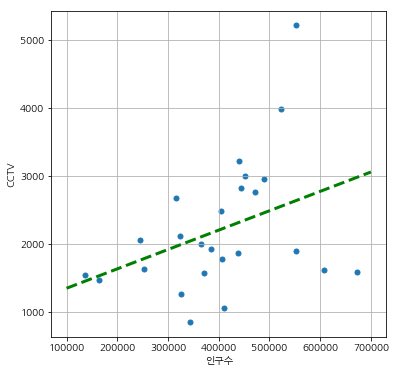

In [128]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=25)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [129]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,1355.057418,551888,546952,4936,66011,0.894384,11.960941,0.946025,2578.470316
관악구,3985,1346.533233,521960,504048,17912,71317,3.431681,13.663308,0.763468,1427.792121
송파구,1586,256.657084,673161,666439,6722,79093,0.998572,11.749492,0.235605,1402.267162
도봉구,858,285.786408,344096,341928,2168,54969,0.630057,15.974902,0.249349,1192.134987
강서구,1617,481.942794,606981,600257,6724,78042,1.107778,12.857404,0.266400,1182.594446


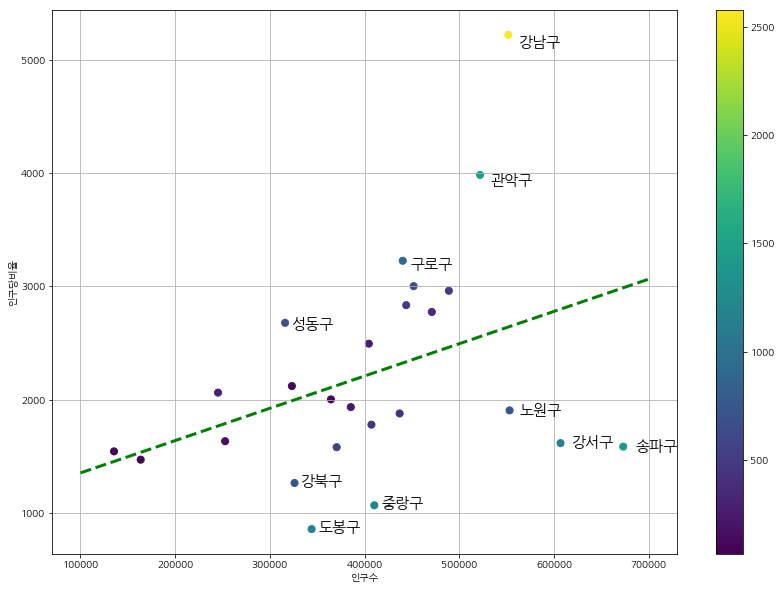

In [131]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()